# Housing prices Regression Project
### Estimation of house price value based of house parameters and location


## California Housing
#### Source
This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability LThe dataset contains 20640 observations and 10 attributes (9 predictors and 1 response)etters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The dataset contains 20640 observations and 10 attributes (9 predictors and 1 response). 
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea
- median_house_value: Median house value for households within a block (measured in US Dollars)

***
<h2><b>Data analysis, visualization and preparation</h2></b>

In [19]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install geopy

In [44]:
#import necessary libraries for preparation data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Google map")

In [305]:
#import necessary libraries for models building
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from matplotlib import style
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
#properties for graphs building in the Jupiter
%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 100
sns.set_context('paper')

In [3]:
#importing csv and review input informations
filename = 'Housing_Regression.csv'
data = pd.read_csv(filename)

In [54]:
print ("data first 10 rows:",'\n',data.head(10),'\n')
print ("data shape:",'\n',data.shape,'\n')
print ("columns:",'\n',data.columns,'\n')
print ("columns:",'\n',data.describe(),'\n')

data first 10 rows: 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0            

<AxesSubplot:>

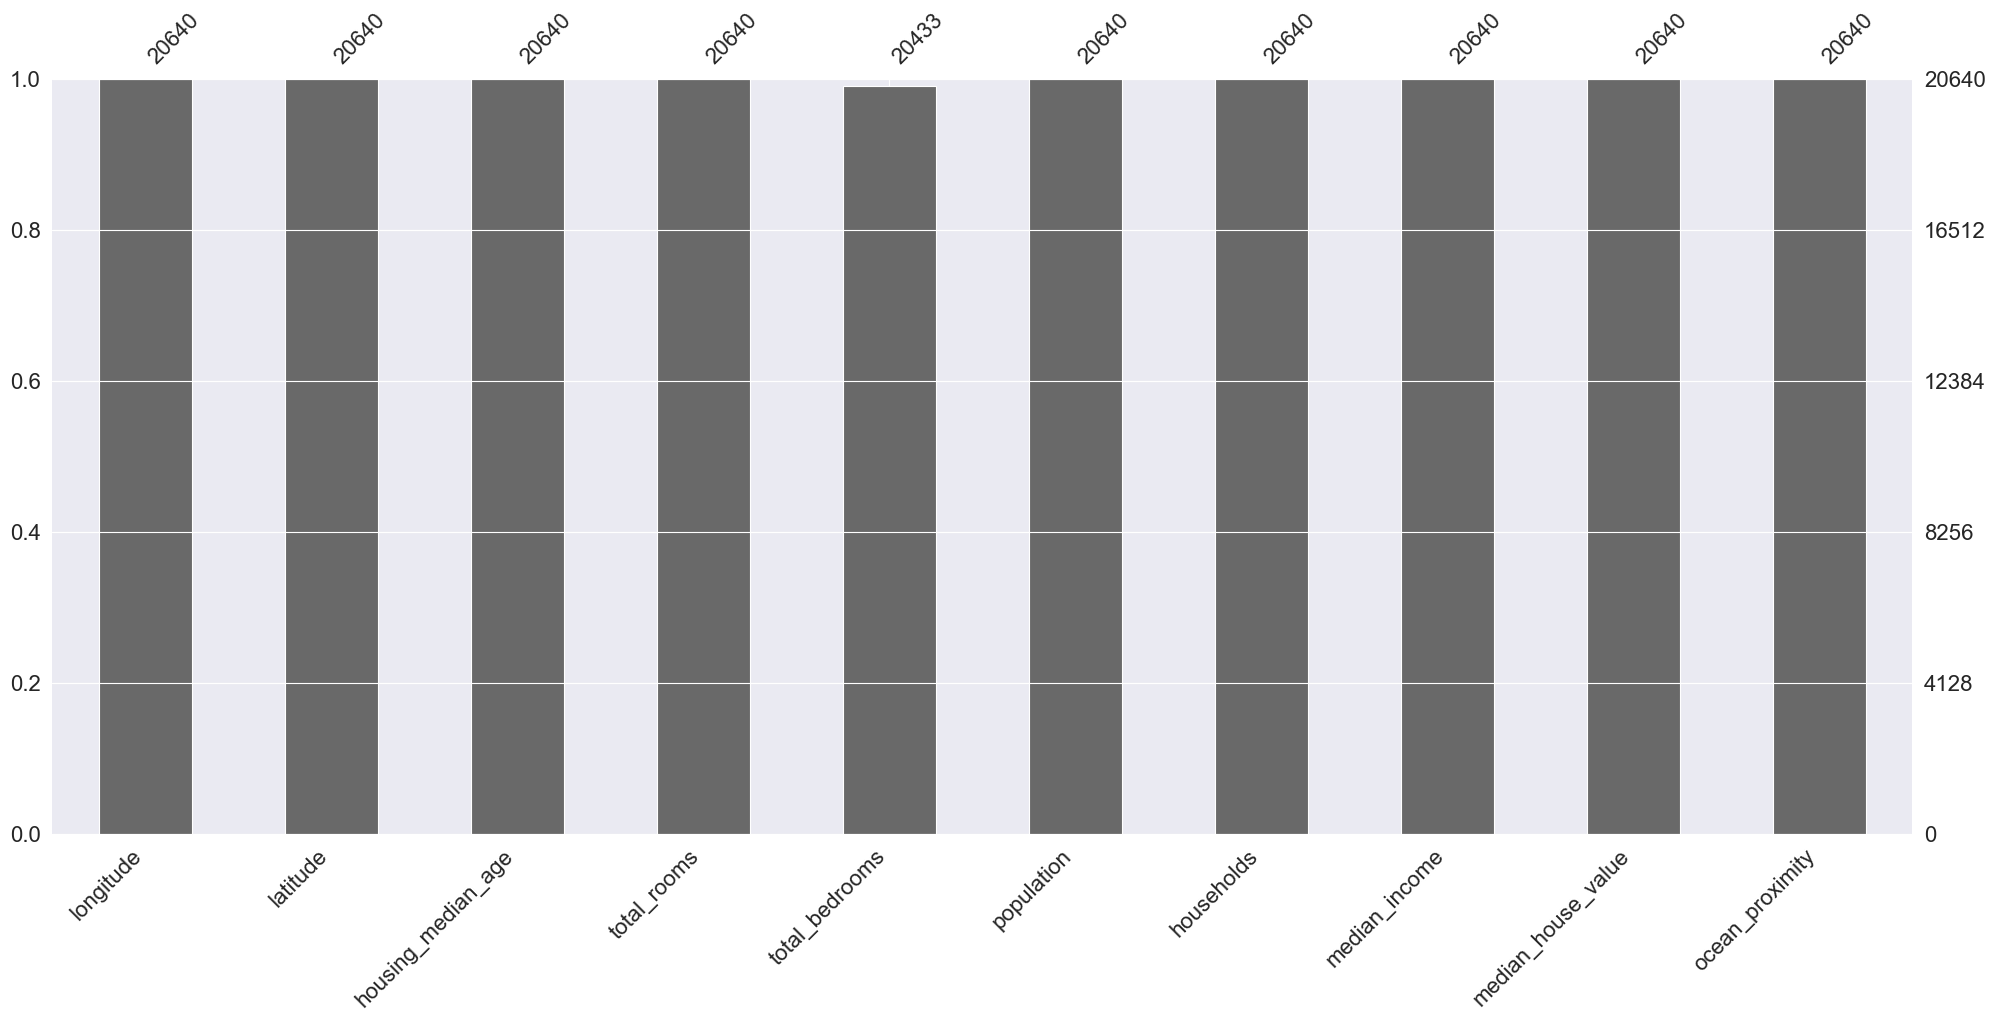

In [5]:
#visualise that dataset has not missing data
msno.bar(data)

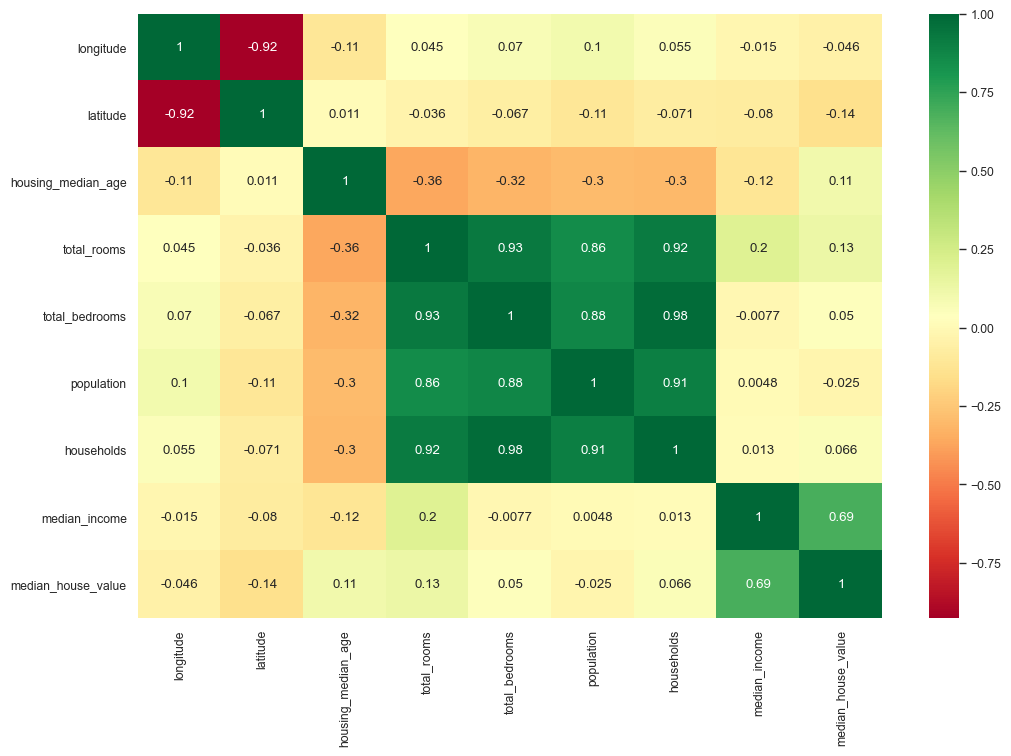

In [20]:
#Create correlation matrix
sns.heatmap(data.corr(),annot = True, cmap='RdYlGn')
plt.show()

In [4]:
df = pd.DataFrame(data, columns = ['median_house_value', 'latitude','longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'])
df['geopoint'] = df[df.columns[1:3]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)
df.drop(['longitude','latitude'], axis='columns', inplace=True)
df.head(20)

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,geopoint
0,452600.0,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,"37.88, -122.23"
1,358500.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,"37.86, -122.22"
2,352100.0,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,"37.85, -122.24"
3,341300.0,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,"37.85, -122.25"
4,342200.0,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,"37.85, -122.25"
5,269700.0,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY,"37.85, -122.25"
6,299200.0,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY,"37.84, -122.25"
7,241400.0,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY,"37.84, -122.25"
8,226700.0,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY,"37.84, -122.26"
9,261100.0,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY,"37.84, -122.25"


In [7]:
'''
def city(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    return city'''

In [8]:
#df['city'] = df['geopoint'].apply(lambda x: city(x))

In [9]:
#write data with city to file for avoiding of waste time after kernel restarting
#df.to_csv('city_house.csv', index=False)

In [60]:
house = pd.read_csv('city_house.csv')
house.drop(['geopoint'], axis='columns', inplace=True)

In [37]:
print(house.head(150))
print(house.shape)

     median_house_value  housing_median_age  total_rooms  total_bedrooms  \
0              452600.0                41.0        880.0           129.0   
1              358500.0                21.0       7099.0          1106.0   
2              352100.0                52.0       1467.0           190.0   
3              341300.0                52.0       1274.0           235.0   
4              342200.0                52.0       1627.0           280.0   
5              269700.0                52.0        919.0           213.0   
6              299200.0                52.0       2535.0           489.0   
7              241400.0                52.0       3104.0           687.0   
8              226700.0                42.0       2555.0           665.0   
9              261100.0                52.0       3549.0           707.0   
10             281500.0                52.0       2202.0           434.0   
11             241800.0                52.0       3503.0           752.0   
12          

In [38]:
# check Null values
house.isnull().sum()

median_house_value       0
housing_median_age       0
total_rooms              0
total_bedrooms         207
population               0
households               0
median_income            0
ocean_proximity          0
city                  8990
dtype: int64

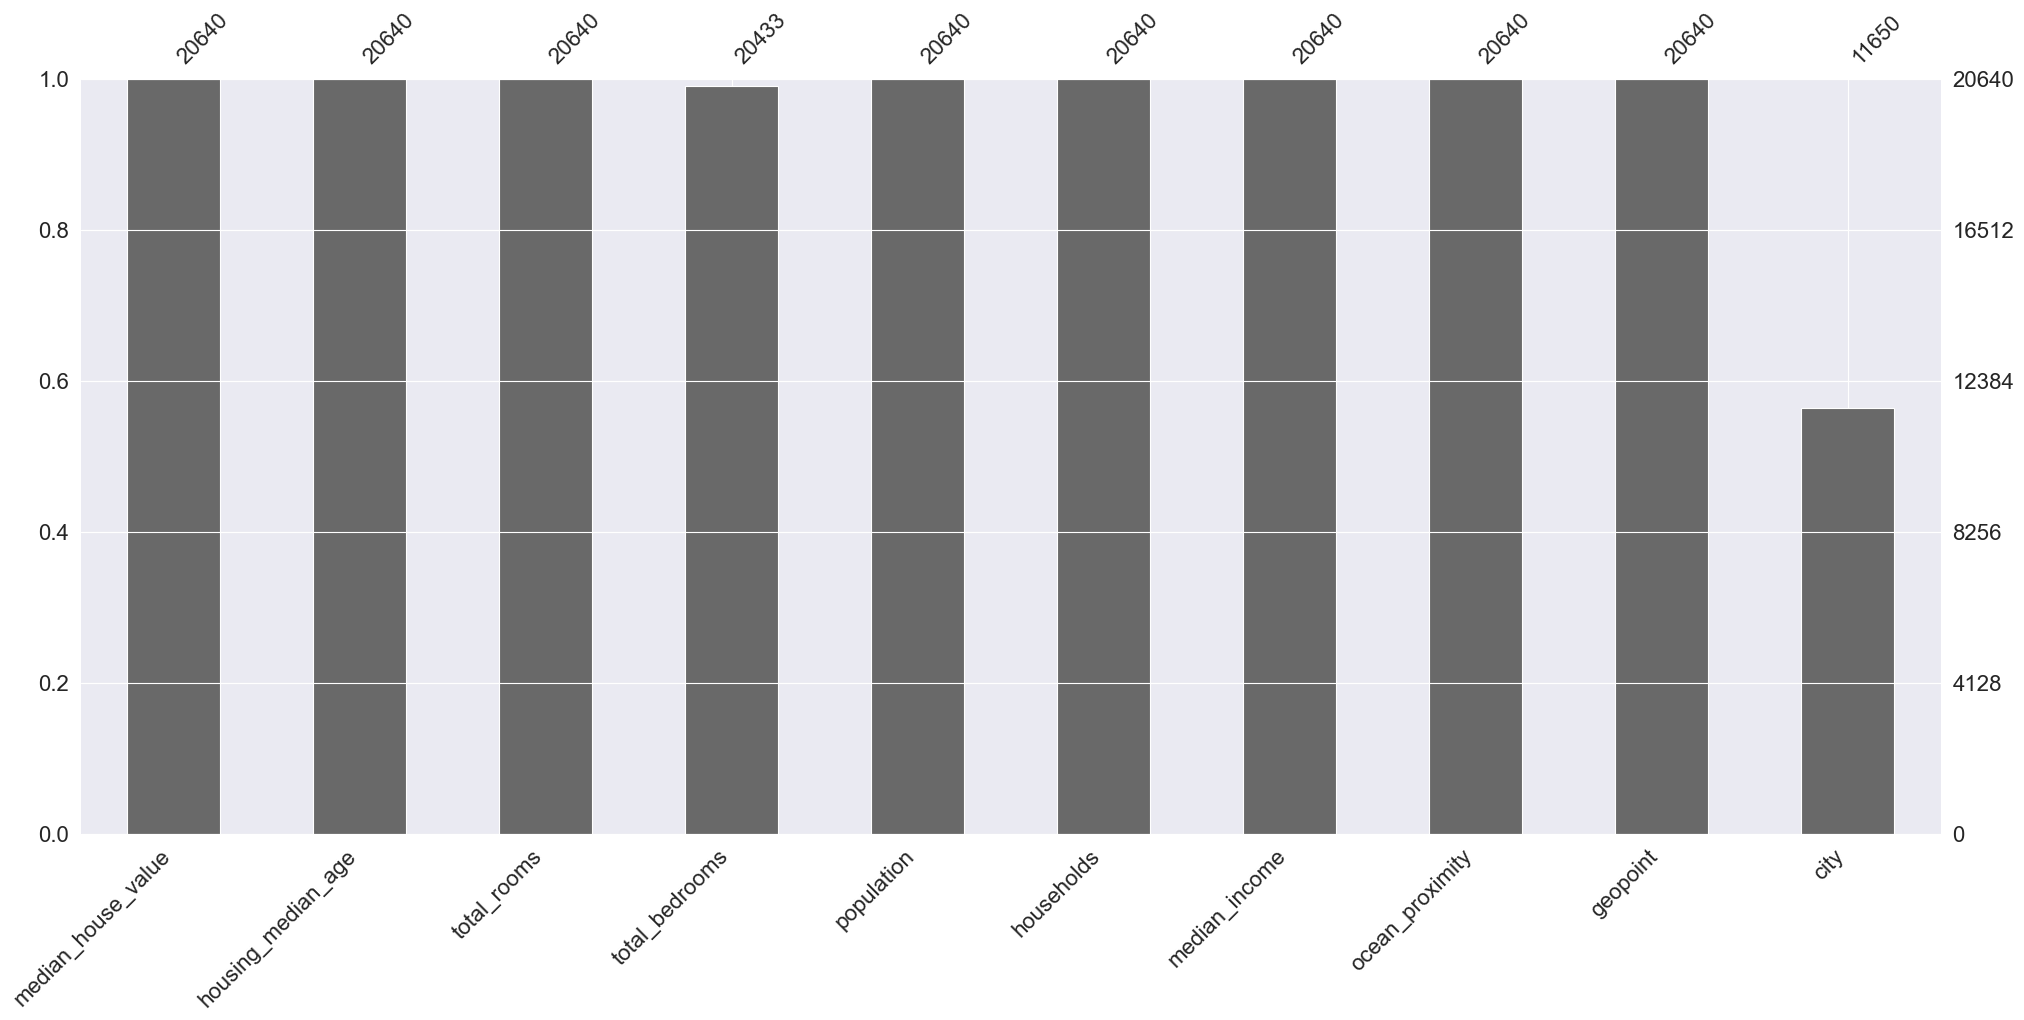

In [17]:
#visualise that dataset has not missing data
msno.bar(house)
plt.show()

In [61]:
#fill zero counts of bedrooms to min value 1 that does not affect whole dataset, but remove null values
house['total_bedrooms'].fillna(1, inplace=True)

In [40]:
# check Null values
house.isnull().sum()

median_house_value       0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
ocean_proximity          0
city                  8990
dtype: int64

In [14]:
import csv
listN=[]
with open('city_house.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['ocean_proximity'], row['geopoint'], row['city'])
        listN.append(row['city'])
#print (listN) 
res = []
for i in listN:
    if i not in res:
        res.append(i)
print (res)
print (len(res))

NEAR BAY 37.88, -122.23 Oakland
NEAR BAY 37.86, -122.22 
NEAR BAY 37.85, -122.24 Oakland
NEAR BAY 37.85, -122.25 Oakland
NEAR BAY 37.85, -122.25 Oakland
NEAR BAY 37.85, -122.25 Oakland
NEAR BAY 37.84, -122.25 Oakland
NEAR BAY 37.84, -122.25 Oakland
NEAR BAY 37.84, -122.26 Oakland
NEAR BAY 37.84, -122.25 Oakland
NEAR BAY 37.85, -122.26 Oakland
NEAR BAY 37.85, -122.26 Oakland
NEAR BAY 37.85, -122.26 Oakland
NEAR BAY 37.84, -122.26 Oakland
NEAR BAY 37.85, -122.26 Oakland
NEAR BAY 37.85, -122.26 Oakland
NEAR BAY 37.85, -122.27 Berkeley
NEAR BAY 37.85, -122.27 Berkeley
NEAR BAY 37.84, -122.26 Oakland
NEAR BAY 37.84, -122.27 Oakland
NEAR BAY 37.85, -122.27 Berkeley
NEAR BAY 37.85, -122.27 Berkeley
NEAR BAY 37.84, -122.27 Oakland
NEAR BAY 37.84, -122.27 Oakland
NEAR BAY 37.84, -122.27 Oakland
NEAR BAY 37.85, -122.28 Berkeley
NEAR BAY 37.85, -122.28 Berkeley
NEAR BAY 37.85, -122.28 Berkeley
NEAR BAY 37.84, -122.28 Oakland
NEAR BAY 37.84, -122.28 Oakland
NEAR BAY 37.84, -122.28 Oakland
NEAR BAY

In [62]:
house.fillna(method='ffill',inplace=True)
house.head(150)

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,city
0,452600.0,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,Oakland
1,358500.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,Oakland
2,352100.0,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,Oakland
3,341300.0,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,Oakland
4,342200.0,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,Oakland
5,269700.0,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY,Oakland
6,299200.0,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY,Oakland
7,241400.0,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY,Oakland
8,226700.0,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY,Oakland
9,261100.0,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY,Oakland


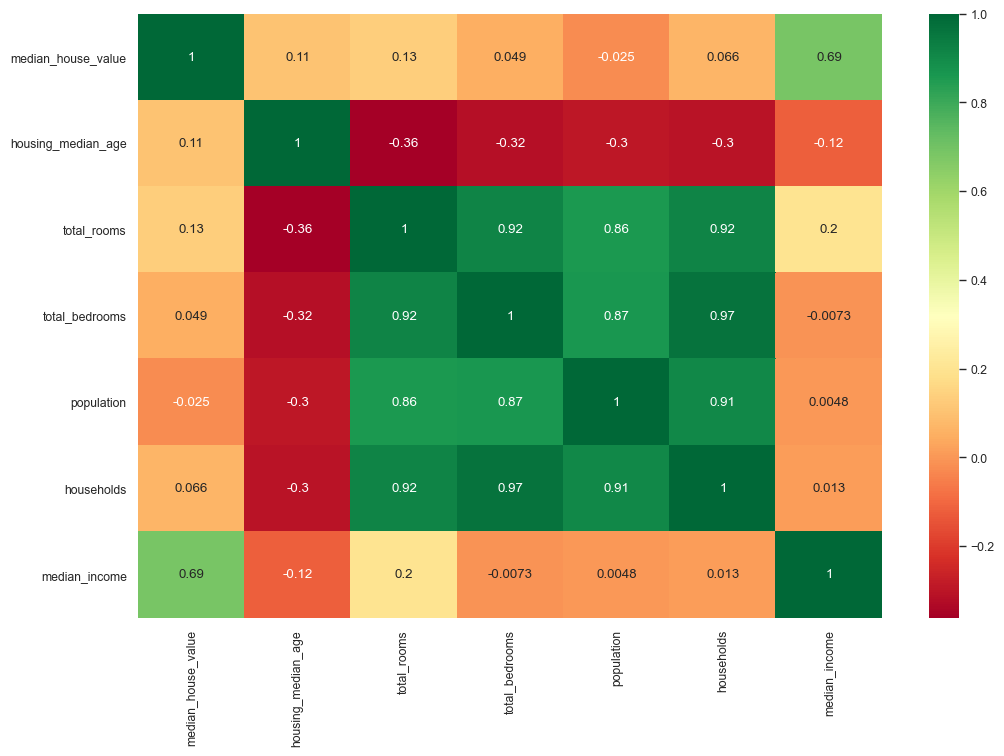

In [42]:
#Create correlation matrix
sns.heatmap(house.corr(),annot = True, cmap='RdYlGn')
plt.show()

C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\

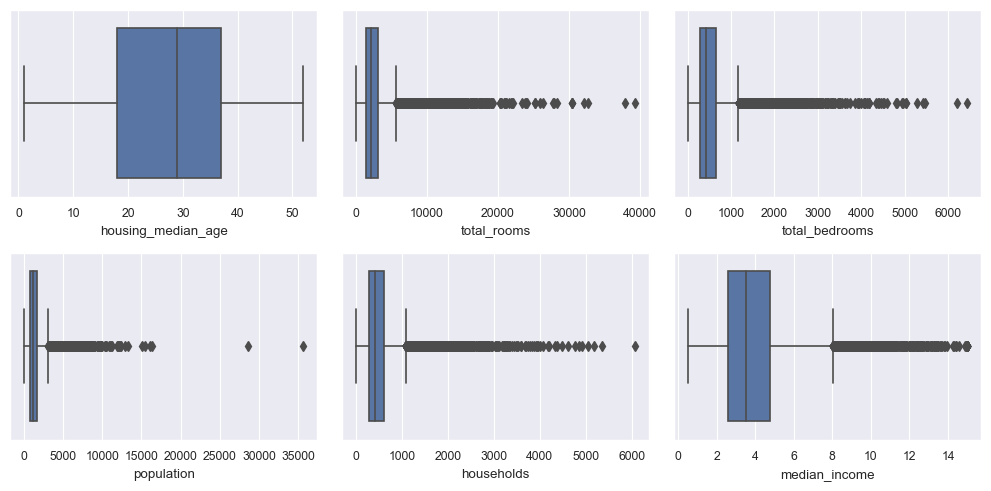

In [63]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(house['housing_median_age'], ax = axs[0,0])
plt2 = sns.boxplot(house['total_rooms'], ax = axs[0,1])
plt3 = sns.boxplot(house['total_bedrooms'], ax = axs[0,2])

plt1 = sns.boxplot(house['population'], ax = axs[1,0])
plt2 = sns.boxplot(house['households'], ax = axs[1,1])
plt3 = sns.boxplot(house['median_income'], ax = axs[1,2])

plt.tight_layout()

In [64]:
#'total_rooms'/ 'total_bedrooms' / 'population' / 'households' have considerable outliers
#Interquartile Range(IQR) method. 
#This technique finds data points that fall outside of 1.5 times of an interquartile 
#range above the 3rd quartile(Q3) and below the 1st quartile(Q1), and drops those entries from the analysis.
# outlier treatment for total_rooms
Q1 = house['total_rooms'].quantile(0.25)
Q3 = house['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['total_rooms'] >= Q1 - 1.5*IQR) & (house['total_bedrooms'] <= Q3 + 1.5*IQR)]
# outlier treatment for total_bedrooms
Q1 = house['total_bedrooms'].quantile(0.25)
Q3 = house['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1
data = house[(house['total_bedrooms'] >= Q1 - 1.5*IQR) & (house['total_bedrooms'] <= Q3 + 1.5*IQR)]
# outlier treatment for population
Q1 = house['population'].quantile(0.25)
Q3 = house['population'].quantile(0.75)
IQR = Q3 - Q1
data = house[(house['population'] >= Q1 - 1.5*IQR) & (house['population'] <= Q3 + 1.5*IQR)]
# outlier treatment for households
Q1 = house['households'].quantile(0.25)
Q3 = house['households'].quantile(0.75)
IQR = Q3 - Q1
data = house[(house['households'] >= Q1 - 1.5*IQR) & (house['households'] <= Q3 + 1.5*IQR)]
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VKrasulya\

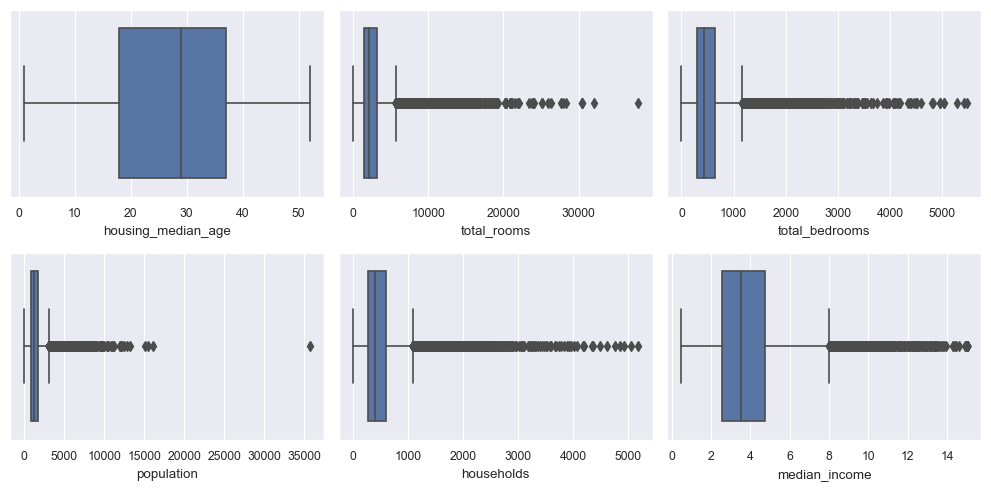

In [65]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(house['housing_median_age'], ax = axs[0,0])
plt2 = sns.boxplot(house['total_rooms'], ax = axs[0,1])
plt3 = sns.boxplot(house['total_bedrooms'], ax = axs[0,2])

plt1 = sns.boxplot(house['population'], ax = axs[1,0])
plt2 = sns.boxplot(house['households'], ax = axs[1,1])
plt3 = sns.boxplot(house['median_income'], ax = axs[1,2])

plt.tight_layout()

In [66]:
house.head()

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,city
0,452600.0,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,Oakland
1,358500.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,Oakland
2,352100.0,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,Oakland
3,341300.0,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,Oakland
4,342200.0,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,Oakland


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

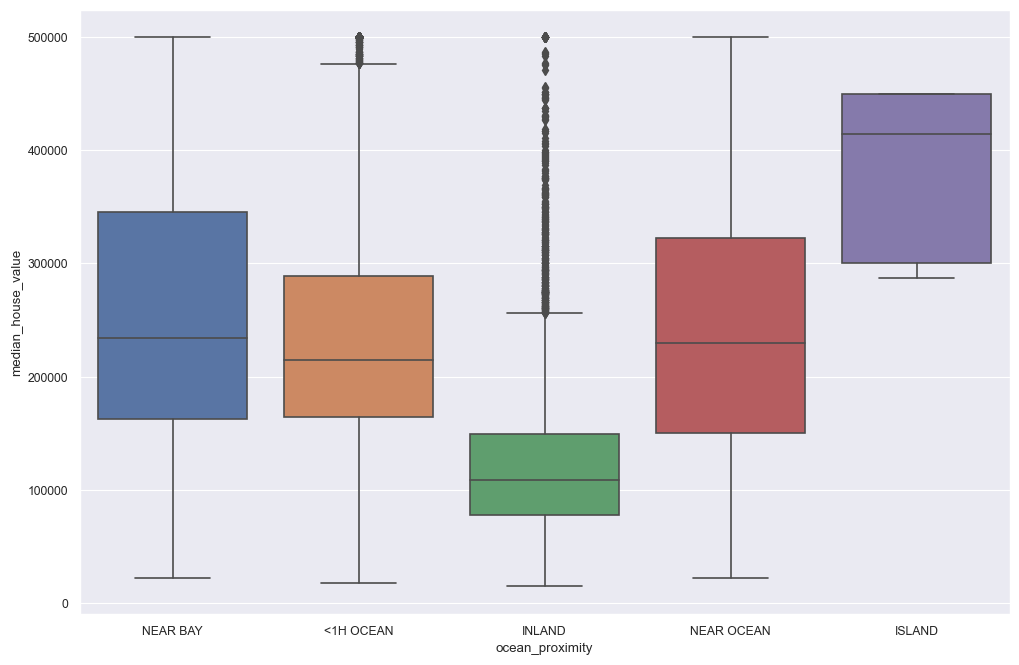

In [74]:
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = house)

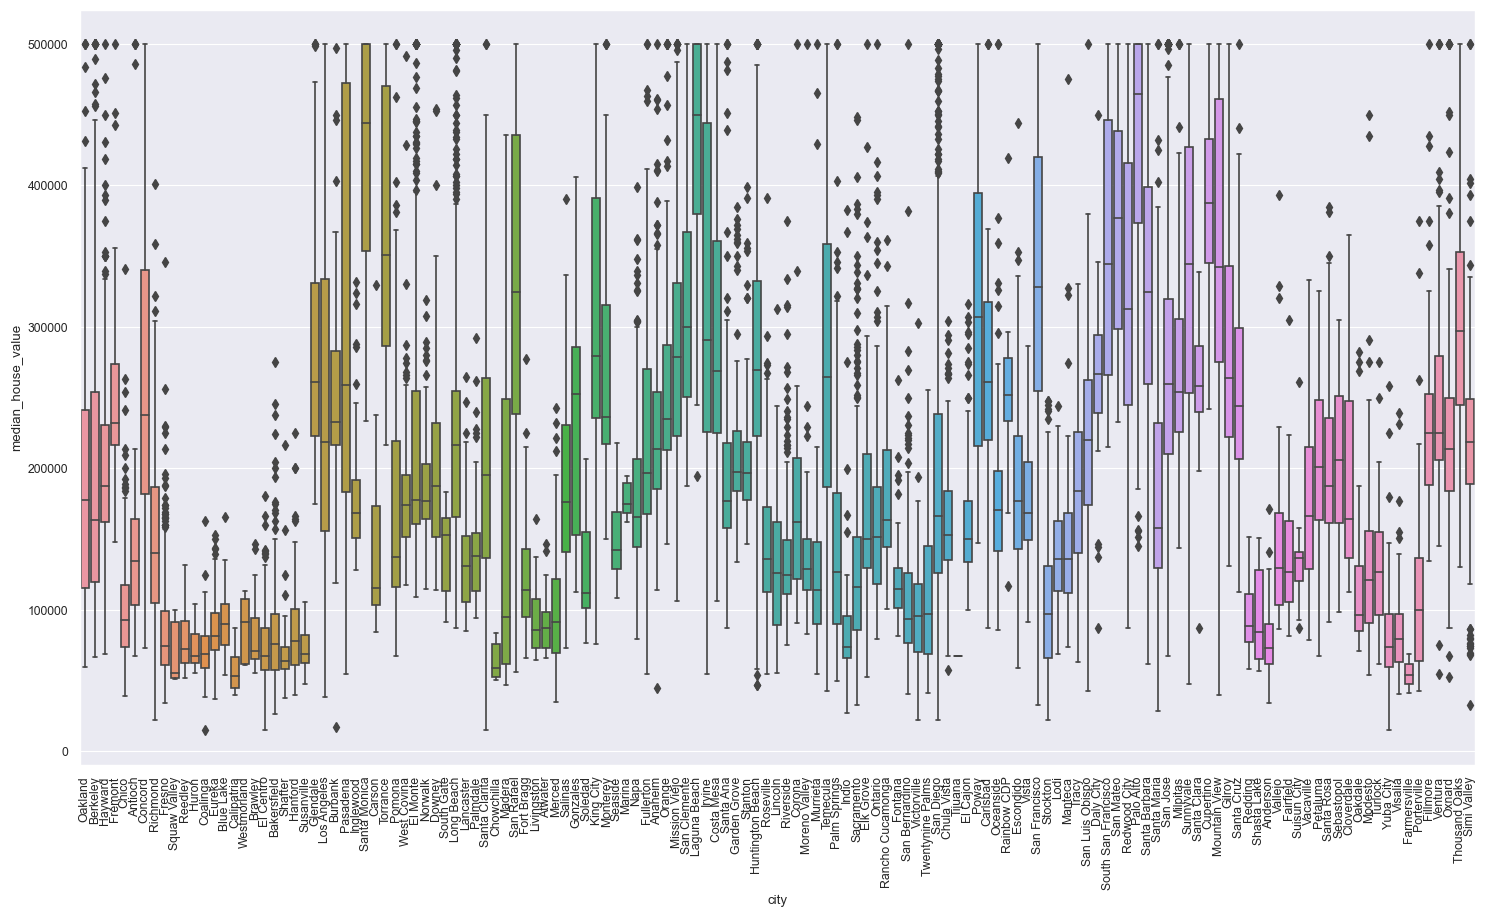

In [97]:
plt.subplots(figsize = (18,10))
sns.boxplot(x = 'city', y = 'median_house_value', data = house)
plt.xticks(rotation=90)
plt.show()

In [106]:
#change object type of categorical column to integer
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
house['ocean_proximity'] = labelencoder.fit_transform(house['ocean_proximity'])
house['city'] = labelencoder.fit_transform(house['city'])

In [107]:
house.dtypes

median_house_value    float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity         int32
city                    int32
dtype: object

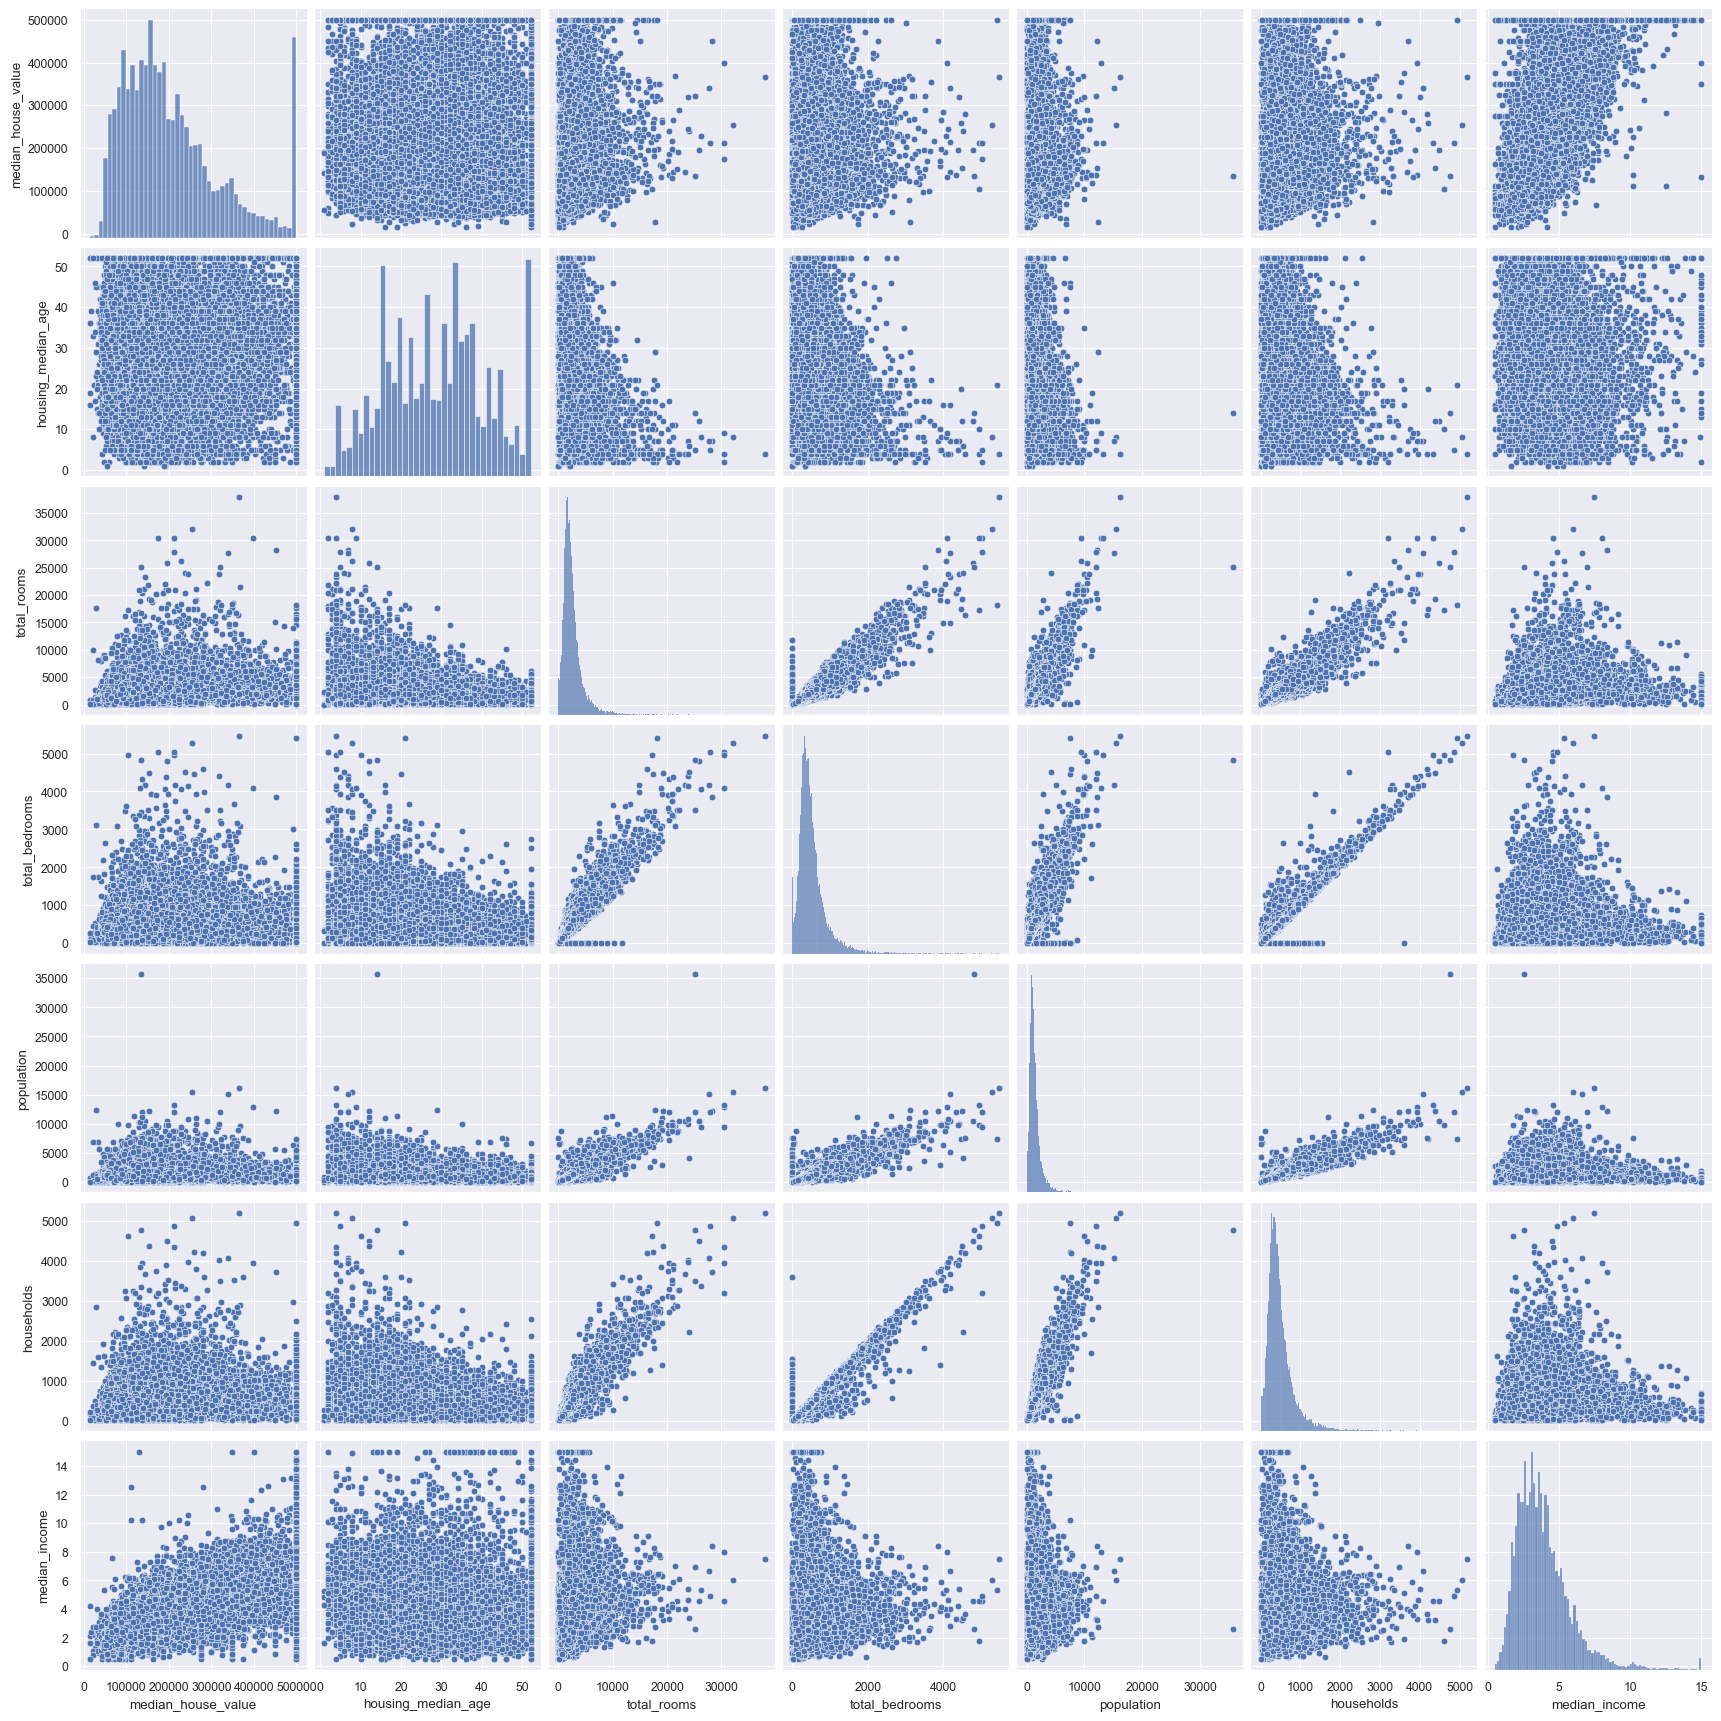

In [98]:
#visualising af all dataset
sns.pairplot(house)
plt.show()

In [110]:
#Dividing into X and Y sets array for the model building
X = np.array(house.loc[:, house.columns != 'median_house_value'])
Y = np.array(house['median_house_value']).reshape(-1,1)
print (X.shape)
print (Y.shape)

(20638, 8)
(20638, 1)


In [111]:
# Standardize X and Y sets (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Ys = scaler.fit_transform(Y)

***
<h2><b>Models Building</h2></b>

In [149]:
#Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys,
                                                    test_size=0.25,
                                                    random_state=4127)

In [234]:
print ('X_train',X_train.shape, 'X_test',X_test.shape, 'y_train',y_train.shape, 'y_test',y_test.shape)

X_train (18575, 8) X_test (2063, 8) y_train (18575, 1) y_test (2063, 1)


***
<b>Cross-validation</b>

In [148]:
#LinearRegression function
linreg = LinearRegression()

scores = cross_val_score(linreg, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(linreg, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))


scores= [0.56032533 0.57377824 0.54936324 0.54953448 0.58644464] 
 mean(scores)= 0.5638891829897108 
 std(scores)= 0.014396551499981237 

accuracy= 0.5826402989925634 mean(accuracy)= 0.5826402989925634 std(accuracy)= 0.0


In [183]:
#function
ridge = Ridge(alpha = 1)
#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(ridge, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(ridge, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))


scores= [0.4401687  0.42501202 0.53568792 0.45216372 0.59412865] 
 mean(scores)= 0.48943220086483563 
 std(scores)= 0.06491029089542882 

accuracy= 0.49515066168904276 mean(accuracy)= 0.49515066168904276 std(accuracy)= 0.0


In [184]:
#function
lasso = Lasso(alpha = 1)
#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lasso, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lasso, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))

scores= [-0.24191415 -0.02690562 -0.09524567 -0.06725667 -0.03758692] 
 mean(scores)= -0.09378180523092042 
 std(scores)= 0.07781928593410663 

accuracy= -0.027830973093403877 mean(accuracy)= -0.027830973093403877 std(accuracy)= 0.0


In [185]:
#function
el_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(el_net , X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(el_net , X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))

scores= [0.44121337 0.41415897 0.53649161 0.45000193 0.5913051 ] 
 mean(scores)= 0.48663419546906994 
 std(scores)= 0.06648216967222792 

accuracy= 0.49363389210767206 mean(accuracy)= 0.49363389210767206 std(accuracy)= 0.0


Degree: 1, Features: 9
Degree: 2, Features: 45
Degree: 3, Features: 165
Degree: 4, Features: 495
Degree: 5, Features: 1287
Degree: 6, Features: 3003
Degree: 7, Features: 6435
Degree: 8, Features: 12870
Degree: 9, Features: 24310


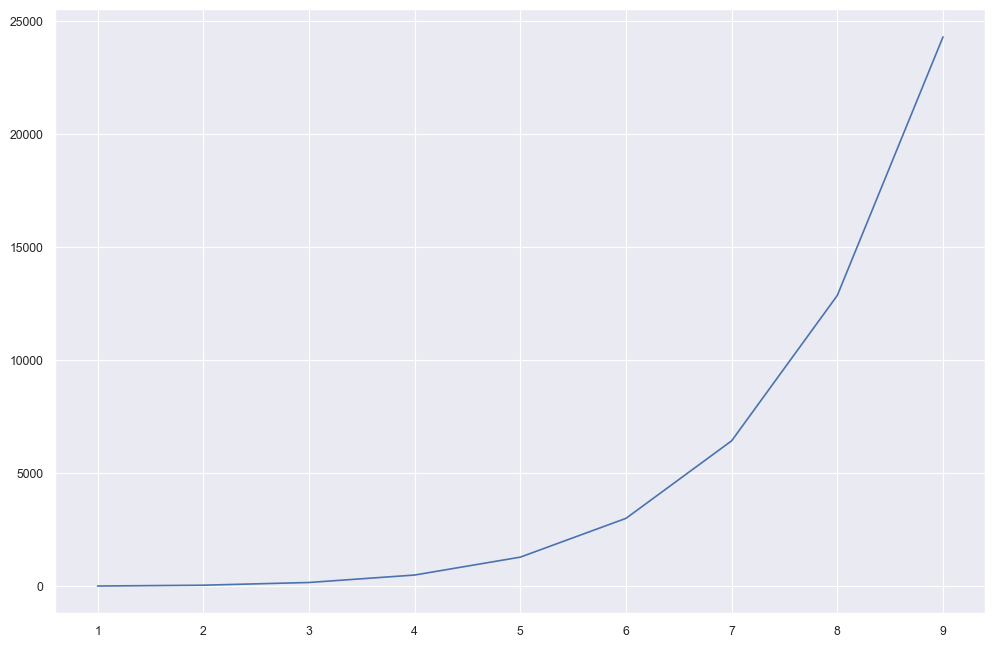

In [237]:
X=X_train.astype('float32')
y=y_train.astype('str')

num_features = list()
degress = [i for i in range(1, 10)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # record number of features
    num_features.append(data.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))

# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

In [220]:
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(dt, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))

scores= [0.11673383 0.24042855 0.33512562 0.17204586 0.2613743 ] 
 mean(scores)= 0.22514163113996907 
 std(scores)= 0.07511908639360558 

accuracy= 0.17532542407433138 mean(accuracy)= 0.17532542407433138 std(accuracy)= 0.0


In [222]:
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('scores=',scores,'\n','mean(scores)=',np.mean(scores),'\n','std(scores)=',np.std(scores),'\n')

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(rf, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print ('accuracy=',accuracy,'mean(accuracy)=', np.mean(accuracy), 'std(accuracy)=',np.std(accuracy))

C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A co

scores= [0.55928758 0.56094924 0.65345613 0.52199901 0.6452803 ] 
 mean(scores)= 0.5881944511067488 
 std(scores)= 0.051918450406394506 



C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:946: DataConversionWarning: A co

accuracy= 0.5998912433050952 mean(accuracy)= 0.5998912433050952 std(accuracy)= 0.0


***

<b>ElasticNet</b>

In [279]:
el_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
el_net.fit(X_train,y_train)

y_pred_net = el_net.predict(X_test)
y_pred_train_net = el_net.predict(X_train)

#result of MAE
mae_test_net = metrics.mean_absolute_error(y_test,y_pred_net)
mae_train_net = metrics.mean_absolute_error(y_train,y_pred_train_net)

#result of MSE
mse_test_net = metrics.mean_squared_error(y_test,y_pred_net)
mse_train_net = metrics.mean_squared_error(y_train,y_pred_train_net)
print ('mse test_net:',mse_test_net)
print ('mse training_net',mse_train_net,'\n')

#R^2
R2_test_net = metrics.r2_score(y_test,y_pred_net)
R2_train_net = metrics.r2_score(y_train,y_pred_train_net)
print ('R2 test_net:',R2_test_net)
print ('R2 training_net',R2_train_net,'\n')

mse test_net: 0.4617681761928531
mse training_net 0.4294138128410294 

R2 test_net: 0.5483535446756376
R2 training_net 0.5694947336465941 



In [281]:
# define parameters
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 0],
    'l1_ratio': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 0],
    'fit_intercept':[True, False],
    'copy_X':[True, False],
    'tol':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 0],
    'warm_start':[True, False],
    'positive':[True, False],
    'selection':['cyclic', 'random']
}
search = GridSearchCV(el_net, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.5236113361580663
Best Hyperparameters: {'alpha': 1e-05, 'copy_X': True, 'fit_intercept': False, 'l1_ratio': 1, 'positive': False, 'selection': 'cyclic', 'tol': 0.1, 'warm_start': True}


In [283]:
el_net = ElasticNet(alpha= 1e-05, copy_X= True, fit_intercept= False, l1_ratio= 1, positive= False, selection= 'cyclic', tol= 0.1, warm_start= True)
el_net.fit(X_train,y_train)

y_pred_net = el_net.predict(X_test)
y_pred_train_net = el_net.predict(X_train)

#result of MAE
mae_test_net = metrics.mean_absolute_error(y_test,y_pred_net)
mae_train_net = metrics.mean_absolute_error(y_train,y_pred_train_net)

#result of MSE
mse_test_net = metrics.mean_squared_error(y_test,y_pred_net)
mse_train_net = metrics.mean_squared_error(y_train,y_pred_train_net)
print ('mse test_net:',mse_test_net)
print ('mse training_net',mse_train_net,'\n')

#R^2
R2_test_net = metrics.r2_score(y_test,y_pred_net)
R2_train_net = metrics.r2_score(y_train,y_pred_train_net)
print ('R2 test_net:',R2_test_net)
print ('R2 training_net',R2_train_net,'\n')

mse test_net: 0.46414110850190604
mse training_net 0.42692272184502505 

R2 test_net: 0.5460326258220594
R2 training_net 0.571992156320658 



<b>Ridge Regression</b>

In [215]:
'''Ridge Regression: 
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. 
This term is the sum of squares of coefficient multiplied by the parameter 
The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. 
This term is called L2 regularization. '''

# Train the model
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_train_ridge = ridge.predict(X_train) 
#result of MSE

mse_test_ridge = metrics.mean_squared_error(y_test,y_pred_ridge)
mse_train_ridge  = metrics.mean_squared_error(y_train,y_pred_train_ridge)
print ('mse test:',mse_test_ridge )
print ('mse training',mse_train_ridge ,'\n')

#R^2
R2_test_ridge  = metrics.r2_score(y_test,y_pred_ridge)
R2_train_ridge = metrics.r2_score(y_train,y_pred_train_ridge)
print ('R2 test:',R2_test_ridge)
print ('R2 training',R2_train_ridge,'\n')


mse test: 0.46412856520312784
mse training 0.4269224580334616 

R2 test: 0.5460448941781811
R2 training 0.5719924208027589 



In [267]:
# define parameters
param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}
search = GridSearchCV(ridge, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.5061492326479148
Best Hyperparameters: {'alpha': 1e-05, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}


In [274]:
# Train the model
ridge = Ridge(alpha = 1e-05, fit_intercept= True, normalize= False, solver= 'svd')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_train_ridge = ridge.predict(X_train) 
#result of MSE

mse_test_ridge = metrics.mean_squared_error(y_test,y_pred_ridge)
mse_train_ridge  = metrics.mean_squared_error(y_train,y_pred_train_ridge)
print ('mse test:',mse_test_ridge )
print ('mse training',mse_train_ridge ,'\n')

#R^2
R2_test_ridge  = metrics.r2_score(y_test,y_pred_ridge)
R2_train_ridge = metrics.r2_score(y_train,y_pred_train_ridge)
print ('R2 test:',R2_test_ridge)
print ('R2 training',R2_train_ridge,'\n')

mse test: 0.46414711126204145
mse training 0.42692242349517273 

R2 test: 0.546026754639338
R2 training 0.5719924554288347 



<b>Linear Regression</b>

In [298]:
#LinearRegression function
linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred_linreg = linreg.predict(X_test)
y_pred_train_linreg = linreg.predict(X_train)

#result of MAE
mae_test = metrics.mean_absolute_error(y_test,y_pred_linreg)
mae_train = metrics.mean_absolute_error(y_train,y_pred_train_linreg)

#result of MSE
mse_test_linreg = metrics.mean_squared_error(y_test,y_pred_linreg)
mse_train_linreg= metrics.mean_squared_error(y_train,y_pred_train_linreg)
print ('mse test:',mse_test_linreg)
print ('mse training',mse_train_linreg,'\n')

#R^2
R2_test_linreg = metrics.r2_score(y_test,y_pred_linreg)
R2_train_linreg = metrics.r2_score(y_train,y_pred_train_linreg)
print ('R2 test:',R2_test_linreg)
print ('R2 training',R2_train_linreg,'\n')

mse test: 0.4641471114480003
mse training 0.4269224234951728 

R2 test: 0.5460267544574553
R2 training 0.5719924554288347 



In [299]:
# define parameters
param = {
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'copy_X':[True, False],
    'positive':[True, False]
}
search = GridSearchCV(linreg, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.5236115385501264
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}


In [300]:
linreg = LinearRegression(copy_X= True, fit_intercept= False, normalize= True, positive= False)
linreg.fit(X_train,y_train)

y_pred_linreg = linreg.predict(X_test)
y_pred_train_linreg = linreg.predict(X_train)

#result of MAE
mae_test = metrics.mean_absolute_error(y_test,y_pred_linreg)
mae_train = metrics.mean_absolute_error(y_train,y_pred_train_linreg)

#result of MSE
mse_test_linreg = metrics.mean_squared_error(y_test,y_pred_linreg)
mse_train_linreg= metrics.mean_squared_error(y_train,y_pred_train_linreg)
print ('mse test:',mse_test_linreg)
print ('mse training:',mse_train_linreg,'\n')

#R^2
R2_test_linreg = metrics.r2_score(y_test,y_pred_linreg)
R2_train_linreg = metrics.r2_score(y_train,y_pred_train_linreg)
print ('R2 test:',R2_test_linreg)
print ('R2 training:',R2_train_linreg,'\n')

mse test: 0.46414142583446455
mse training 0.4269227112282268 

R2 test: 0.5460323154452673
R2 training 0.5719921669644412 



>1 -0.475 (0.030)


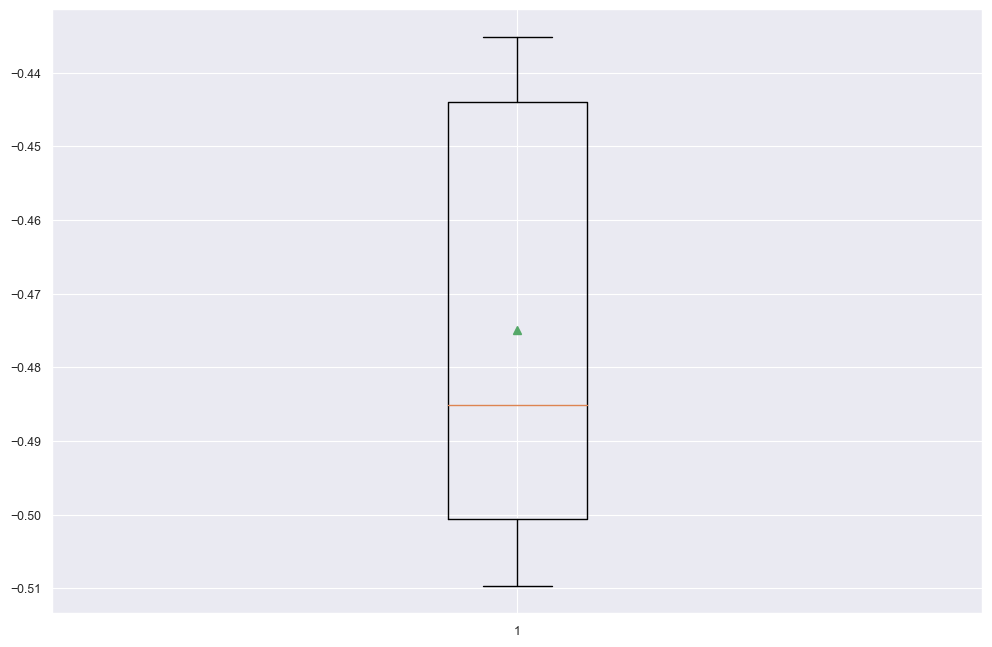

In [275]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1,6):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = LinearRegression(copy_X= True, fit_intercept= False, normalize= True, positive= False)
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
        return models
    
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
    return scores
 
X=X_train.astype('float32')
y=y_train.astype('str')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<b>Voting Regressor</b>

In [288]:
model1 =LinearRegression(copy_X= True, fit_intercept= False, normalize= True, positive= False)
model2 = ElasticNet(alpha= 1e-05, copy_X= True, fit_intercept= False, l1_ratio= 1, positive= False, selection= 'cyclic', tol= 0.1, warm_start= True)
model3 = Ridge(alpha = 1e-05, fit_intercept= True, normalize= False, solver= 'svd')

model = VotingRegressor([('model1', model1), ('model2', model2),('model3', model3)])
model.fit(X_train, y_train)
print ('ElasticNetR2:')
print ('R2 test_net:',R2_test_net)
print ('R2 training_net',R2_train_net,'\n')
print ('LinearRegression:')
print ('R2 test_lin:',R2_test_linreg)
print ('R2 training_lin',R2_train_linreg,'\n')
print ('Ridge:')
print ('R2 test_lin:',R2_test_ridge)
print ('R2 training_lin',R2_train_ridge,'\n')

ElasticNetR2:
R2 test_net: 0.5460326258220594
R2 training_net 0.571992156320658 

LinearRegression:
R2 test_lin: 0.5460306300540259
R2 training_lin 0.5719923260397963 

Ridge:
R2 test_lin: 0.546026754639338
R2 training_lin 0.5719924554288347 



C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [289]:
y_pred_model = model.predict(X_test)
y_pred_train_model= model.predict(X_train)

#R^2
R2_test_model = metrics.r2_score(y_test,y_pred_model)
R2_train_model = metrics.r2_score(y_train,y_pred_train_model)
print ('R2 test:',R2_test_model)
print ('R2 training',R2_train_model,'\n')

R2 test: 0.5460306300540259
R2 training 0.5719923260397963 



<b>Random Forest</b>

In [310]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

#result of MSE
mse_test_rf = metrics.mean_squared_error(y_test,y_pred_rf)
mse_train_rf= metrics.mean_squared_error(y_train,y_pred_train_rf)
print ('mse test:',mse_test_rf)
print ('mse training',mse_train_rf,'\n')

#R^2
R2_test_rf = metrics.r2_score(y_test,y_pred_rf)
R2_train_rf = metrics.r2_score(y_train,y_pred_train_rf)
print ('R2 test:',R2_test_rf)
print ('R2 training',R2_train_rf)

<ipython-input-310-24cd4bfbe063>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


mse test: 0.25165290336687385
mse training 0.033710040667426 

R2 test: 0.7538631988137168
R2 training 0.9662042775468732


In [ ]:
#Creating parameter grid
n_estimators = [int(x) for x in np.linspace(600, stop = 900, num = 4)]
max_depth = [int(x) for x in np.linspace(12, 16, num = 5)]

param = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features':['auto', 'sqrt', 'log2'],
            'min_samples_leaf':[0.005,0.0025,0.0015,0.001,0.0005],
            'min_samples_split':[7,10,12,15,20],
            'bootstrap':[True, False],
            'oob_score':[True, False],
            'warm_start':[True, False]              
            }

search = GridSearchCV(rf, param, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, cv=5)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


In [ ]:
param=result.best_params_
rf = RandomForestRegressor(param)
rf.fit(X_train,y_train)

y_pred_rf = linreg.predict(X_test)
y_pred_train_rf = linreg.predict(X_train)

#result of MSE
mse_test_rf = metrics.mean_squared_error(y_test,y_pred_rf)
mse_train_rf= metrics.mean_squared_error(y_train,y_pred_train_rf)
print ('mse test:',mse_test_rf)
print ('mse training',mse_train_rf,'\n')

#R^2
R2_test_rf = metrics.r2_score(y_test,y_pred_rf)
R2_train_rf = metrics.r2_score(y_train,y_pred_train_rf)
print ('R2 test:',R2_test_rf)
print ('R2 training',R2_train_rf)

<b>Gradient Boosting Regressor</b>

In [309]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_test)
y_pred_train_gbr = gbr.predict(X_train)

#result of MSE
mse_test_gbr = metrics.mean_squared_error(y_test,y_pred_gbr)
mse_train_gbr= metrics.mean_squared_error(y_train,y_pred_train_gbr)
print ('mse test:',mse_test_gbr)
print ('mse training',mse_train_gbr,'\n')

#R^2
R2_test_gbr = metrics.r2_score(y_test,y_pred_gbr)
R2_train_gbr = metrics.r2_score(y_train,y_pred_train_gbr)
print ('R2 test:',R2_test_gbr)
print ('R2 training',R2_train_gbr)

C:\Users\VKrasulya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mse test: 0.2787336349464817
mse training 0.251274486156593 

R2 test: 0.7273760629388264
R2 training 0.7480868422117897


In [ ]:
#setting up parameter grid
n_estimators = [int(x) for x in np.linspace(50,400,num=8)]
learning_rate = [round(x,3) for x in np.logspace(0,-3,num=10)]
max_depth = [int(x) for x in np.linspace(5,10,num=6)]

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01, 0.005, 0.001],
              'subsample':[0.7,0.8,0.9],
              'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[0.005,0.0035,0.0025,0.0015,0.001],
            'min_samples_split':[10,15,20,25]}

rand_gbr = RandomizedSearchCV(estimator=gbr,
                             param_distributions=param_grid,
                             scoring='neg_mean_squared_error',
                             cv=5,
                             verbose=2,
                             n_iter = 100,
                             n_jobs=-1)


search = rand_gbr
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
param=result.best_params_
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred_gbr = linreg.predict(X_test)
y_pred_train_gbr = linreg.predict(X_train)

#result of MSE
mse_test_gbr = metrics.mean_squared_error(y_test,y_pred_gbr)
mse_train_gbr= metrics.mean_squared_error(y_train,y_pred_train_gbr)
print ('mse test:',mse_test_rf)
print ('mse training',mse_train_rf,'\n')

#R^2
R2_test_gbr = metrics.r2_score(y_test,y_pred_gbr)
R2_train_gbr = metrics.r2_score(y_train,y_pred_train_gbr)
print ('R2 test:',R2_test_gbr)
print ('R2 training',R2_train_gbr)